In [107]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [108]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
stop_common=set(stopwords.words('english'))
import matplotlib.pyplot as plt
import requests
import random 
from collections import OrderedDict
import bs4
from bs4 import BeautifulSoup
import re
from tqdm import tqdm
from tqdm import tqdm_notebook
import time
from time import sleep
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,  mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

In [109]:
sde_salaries = pd.read_csv('/content/North_America_soft_dev.csv')

In [110]:
sde_salaries.head()

,location,title,company,salary,summary
0,"Calgary, AB",Software Developer / Q&A / Testing,Next Rain Irrigation Ltd,62500.0,Your day to day tasks with be testing existing...
1,"Calgary, AB",Software Developer,Patronscan,75000.0,As a minimum we want you to have experience wi...
2,"Calgary, AB",Junior Developer,Tekarra Projects,58184.0,A certified application developer is a plus.Th...
3,"Calgary, AB",Full Stack Developer,DocuPet,75000.0,This role may be conducted from either of thos...
4,"Calgary, AB",Blockchain Developer,HTRUST,109200.0,Software developement : 5 years (Required).3-5...


In [111]:
round(sde_salaries.salary.describe(),2)

count      1186.00
mean     122089.86
std       47980.92
min       20764.50
25%       85000.00
50%      120000.00
75%      152400.00
max      349250.00
Name: salary, dtype: float64

In [112]:
#Get the median salary for data scientist job postings
sde_median_salary = np.median(sde_salaries.salary)

In [113]:
#Transfer continuous variable to binary variables
sde_salaries['high_salary'] = [1 if i > sde_median_salary else 0 for i in sde_salaries.salary]

In [114]:
#Function to clean the data.
def clean_data(data, stop_common):
    stop_common = set.union(stop_common, {'will', 'na', 'tools', 'software','full time',
                                          'skills','using', 'system', 'year', 'building', 'new',
                                         "build", "years", "scientist", "developer", "developers",
                                         "work", "knowledge", "full", "time", "provide", "looking",
                                         "role", "development", "engineer", "engineering", "including",
                                         "engineers", "working", "data", "scientists", "large", "use", "etc",
                                          "similar", "one"})
    data = data.lower() #transfer to lower case
    data = data.replace("'s", "") #remove 's
    data = re.sub(r'[^\w]', ' ', data) #remove all symbol
    data = filter(lambda w: not w in stop_common,data.split(" "))#split the sentence and remove the stop words
    data = list(filter(("").__ne__, data)) #remove blank element
    
    return data

1186


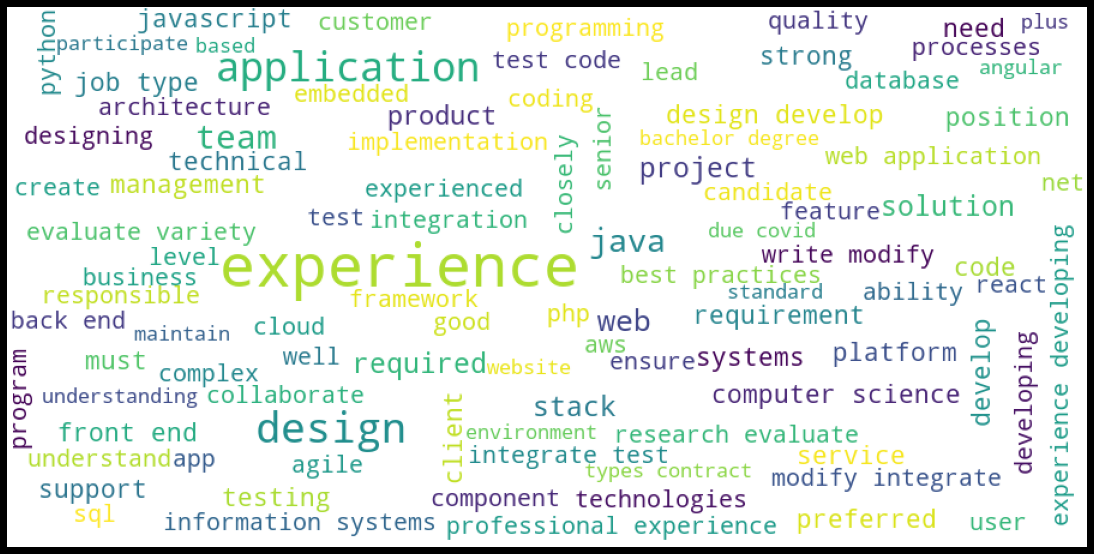

In [115]:
#Word frequency visualization
result = []
for i in range(sde_salaries.shape[0]):
    result+=clean_data(sde_salaries.iloc[i]["summary"], stop_common)
wordcloud = WordCloud(max_font_size=50, max_words=100, width=900, height=450, background_color="white").generate(",".join(result))
wordcloud.to_file("SDE.png")
plt.figure( figsize=(15,7.5), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [134]:
import plotly.graph_objs as go
from plotly.offline import iplot

# Creating trace1
trace1 = go.Histogram(x = sde_salaries.salary,
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    )

data = [trace1]
layout = dict(title = 'Salary Variation for Software Developers',
              xaxis= dict(title= 'Salary Variation',ticklen= 5,zeroline= False),
              autosize=False,
    width=400,
    height=400,
    margin=go.layout.Margin(
        l=10,
        r=10,
        b=100,
        t=100,
        pad = 4
             ))
fig = dict(data = data, layout = layout)

iplot(fig)

In [135]:
trace1 = go.Scatter(y = ds_salaries.salary,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(200, 112, 2, 0.8)'),
                    )

data = [trace1]
layout = dict(title = 'Salary Variation for Software Developers',
              xaxis= dict(title= 'Salary Variation',ticklen= 5,zeroline= False),
              autosize=False,
    width=400,
    height=400,
    margin=go.layout.Margin(
        l=10,
        r=10,
        b=100,
        t=100,
        pad = 4
             ))
fig = dict(data = data, layout = layout)

iplot(fig)

#### Only Location
Fit the random forest model using only locations

In [136]:
#Data features
sde_salaries.location.value_counts()

Toronto, ON                                     73
Vancouver, BC                                   39
Chicago, IL                                     32
Montréal, QC                                    31
Atlanta, GA                                     22
                                                ..
St. Louis, MO 63109 (Saint Louis Hills area)     1
Denver, CO 80205 (Five Points area)              1
Cambridge, ON                                    1
Houston, TX 77036 (Sharpstown area)              1
Chicago, IL 60607 (The Loop area)                1
Name: location, Length: 437, dtype: int64

In [137]:
cities = []
states = []
#Data preprocessing
for loc in sde_salaries.location:
    items = loc.split(',')
    cities.append(items[0])
    states.append(items[1])


In [138]:
only_states = []
for state in states:
    only_states.append(re.search(r'\w+', state).group(0))
print(len(only_states))

1186


In [139]:
sde_salaries['city'] = cities
sde_salaries['state'] = only_states

In [140]:
sde_salaries.city = sde_salaries.city + ", " + sde_salaries.state

In [141]:
for i in sde_salaries.state:
    if len(i) > 2:
        print(i)

In [142]:
sde_salaries

,location,title,company,salary,summary,high_salary,city,state
0,"Calgary, AB",Software Developer / Q&A / Testing,Next Rain Irrigation Ltd,62500.000,Your day to day tasks with be testing existing...,0,"Calgary, AB",AB
1,"Calgary, AB",Software Developer,Patronscan,75000.000,As a minimum we want you to have experience wi...,0,"Calgary, AB",AB
2,"Calgary, AB",Junior Developer,Tekarra Projects,58184.000,A certified application developer is a plus.Th...,0,"Calgary, AB",AB
3,"Calgary, AB",Full Stack Developer,DocuPet,75000.000,This role may be conducted from either of thos...,0,"Calgary, AB",AB
4,"Calgary, AB",Blockchain Developer,HTRUST,109200.000,Software developement : 5 years (Required).3-5...,0,"Calgary, AB",AB
...,...,...,...,...,...,...,...,...
1181,"Atlanta, GA 30303 (Five Points area)",COBOL App Programmer/Analyst,Riya Software Consulting,111252.000,Guide and mentor less experienced programmers/...,0,"Atlanta, GA",GA
1182,"Atlanta, GA",UI Developer only W2,Calypso Way,125933.835,"3 years experience in front-end development, s...",1,"Atlanta, GA",GA
1183,"Atlanta, GA",Software Engineer - Cybersecurity,Secmation,136525.000,Experience in software product development usi...,1,"Atlanta, GA",GA
1184,"Alpharetta, GA",Angular Developer (w2 only),Infolob,87725.885,2+ years of experience in software development...,0,"Alpharetta, GA",GA


In [143]:
sde_salaries.city.nunique()

239

In [144]:
sde_salaries.city.value_counts()

Toronto, ON       73
Chicago, IL       40
Vancouver, BC     39
New York, NY      34
Austin, TX        32
                  ..
Coraopolis, PA     1
Menlo Park, CA     1
Novato, CA         1
Seal Beach, CA     1
Industry, CA       1
Name: city, Length: 239, dtype: int64

In [145]:
#Transfer the cities to dummy variables
city_dummies = pd.get_dummies(sde_salaries.city)

X_city = city_dummies
y_city = sde_salaries.high_salary

In [146]:
#Split the dataset into train dateset and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_city, y_city, test_size=0.33, random_state=90)

In [150]:
#use Random forest as our classification models
rfc = RandomForestClassifier(n_estimators=200, random_state=90)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, rfc_pred)
print ("Accuracy Score:", acc.round(4))
s = cross_val_score(rfc, X_city, y_city, cv=3, n_jobs=-1)
print ("Cross Validation Score:\t{:0.3} ± {:0.3}".format(s.mean().round(3), s.std().round(3)))

Accuracy Score: 0.6862
Cross Validation Score:	0.329 ± 0.12


In [151]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_city.columns).reset_index()
feature_importances.columns = ['feature', 'importance']

feature_medians = []
for i in X_city.columns:
    feature_medians.append(np.median(sde_salaries[sde_salaries.city == i].salary))

feature_importances['median_salary'] = feature_medians
feature_importances['over_or_under'] = [1 if i > sde_median_salary else 0 for i in feature_importances.median_salary]

feature_importances.sort_values('importance', ascending=False).head(15)

,feature,importance,median_salary,over_or_under
213,"Toronto, ON",0.059478,85000.00,0
135,"Montréal, QC",0.056444,75625.00,0
217,"Vancouver, BC",0.039826,85000.00,0
36,"Calgary, AB",0.038541,75000.00,0
35,"Burnaby, BC",0.031246,76000.00,0
208,"Surrey, BC",0.023068,73200.00,0
90,"Hamilton, ON",0.021099,76309.50,0
133,"Mississauga, ON",0.019385,94500.00,0
89,"Halifax, NS",0.018743,75037.25,0
225,"Washington, DC",0.014231,128778.00,1


#### Only summary
Fit the model using only the summaries (after the word tokenization and cleaning)

In [152]:
sde_salaries_w_desc = sde_salaries[sde_salaries.summary.notnull()]

X_summ = sde_salaries_w_desc.summary
y_summ = sde_salaries_w_desc.high_salary

In [153]:
cv = CountVectorizer(stop_words="english")
cv.fit(X_summ)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [154]:
len(cv.get_feature_names())

2706

In [155]:
X_summ_trans = pd.DataFrame(cv.transform(X_summ).todense(), columns=cv.get_feature_names())

In [156]:
X_train, X_test, y_train, y_test = train_test_split(np.asmatrix(X_summ_trans), y_summ, test_size=0.33,
                                                    random_state=90, stratify=y_summ)

In [157]:
word_counts = X_summ_trans.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

software        911
experience      497
development     408
years           315
developer       224
design          211
web             143
time            129
work            126
applications    122
team            109
java            109
develop         109
developers      106
code             97
systems          90
end              90
using            87
data             87
test             86
dtype: int64

In [158]:
word_counts.to_csv('ds-indeed-words.csv', encoding='utf-8')

In [160]:
rfc = RandomForestClassifier(200, random_state=90)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, rfc_pred)
print("Accuracy Score:", acc.round(3))

s = cross_val_score(rfc, X_summ_trans.values, y_summ.values, cv=10, n_jobs=-1)
print("Cross Validation Score: {:0.3} ± {:0.3}".format(s.mean().round(3), s.std().round(3)))

Accuracy Score: 0.656
Cross Validation Score: 0.657 ± 0.05


In [161]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_summ_trans.columns).reset_index()
feature_importances.columns = ['feature', 'importance']

feature_medians = []
feature_means = []
for i in X_summ_trans.columns:
    feature_medians.append(np.median(sde_salaries_w_desc[sde_salaries_w_desc.summary.str.lower().str.contains(i)].salary))
    feature_means.append(round(np.mean(sde_salaries_w_desc[sde_salaries_w_desc.summary.str.lower().str.contains(i)].salary),2))


feature_importances['median_salary'] = feature_medians
feature_importances['mean_salary'] = feature_means
feature_importances['over_or_under'] = [1 if i > sde_median_salary else 0 for i in feature_importances.median_salary]

feature_importances.sort_values('importance', ascending=False).head(20)

,feature,importance,median_salary,mean_salary,over_or_under
898,experience,0.018940,133350.0000,134924.87,1
1307,java,0.013250,137160.0000,137058.99,1
2696,years,0.012509,133731.0000,137123.23,1
2264,software,0.010580,120650.0000,122257.60,1
685,development,0.008900,125933.8350,127271.57,1
682,developer,0.006823,121920.0000,124492.48,1
2439,test,0.006290,104976.9300,114547.66,0
664,design,0.005772,115402.0425,119878.84,0
2459,time,0.005004,120940.1950,122529.50,1
2644,web,0.004768,90145.9600,100054.24,0


#### Only title
Fit the model using only titles

In [162]:
sde_salaries_w_desc = sde_salaries[sde_salaries.summary.notnull()]

X_title = sde_salaries_w_desc.title
y_title = sde_salaries_w_desc.high_salary

In [163]:
cv = CountVectorizer(stop_words="english")
cv.fit(X_title)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [164]:
X_title_trans = pd.DataFrame(cv.transform(X_title).todense(), columns=cv.get_feature_names())

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X_title_trans, y_title, test_size=0.33, random_state=90)

In [166]:
rfc = RandomForestClassifier(200, random_state=90)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, rfc_pred)
print("Accuracy Score:", acc.round(3))

s = cross_val_score(rfc, X_title_trans.values, y_title.values, cv=10, n_jobs=-1)
print("Cross Validation Score: {:0.3} ± {:0.3}".format(s.mean().round(3), s.std().round(3)))

Accuracy Score: 0.668
Cross Validation Score: 0.681 ± 0.02


In [167]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_title_trans.columns).reset_index()
feature_importances.columns = ['feature', 'importance']

feature_medians = []
feature_means = []
for i in X_title_trans.columns:
    feature_medians.append(np.median(sde_salaries_w_desc[sde_salaries_w_desc.title.str.lower().str.contains(i)].salary))
    feature_means.append(round(np.mean(sde_salaries_w_desc[sde_salaries_w_desc.title.str.lower().str.contains(i)].salary),2))


feature_importances['median_salary'] = feature_medians
feature_importances['mean_salary'] = feature_means
feature_importances['over_or_under'] = [1 if i > sde_median_salary else 0 for i in feature_importances.median_salary]

feature_importances.sort_values('importance', ascending=False).head(20)

,feature,importance,median_salary,mean_salary,over_or_under
253,java,0.062602,144780.0000,148811.24,1
491,web,0.051886,71814.0000,83473.08,0
125,developer,0.031669,114300.0000,118700.81,0
416,software,0.029339,114300.0000,120016.71,0
400,senior,0.028313,133350.0000,140016.38,1
159,engineer,0.027455,133350.0000,133776.42,1
317,net,0.025636,138000.1050,146053.21,1
431,stack,0.024466,113012.5375,114651.93,0
429,sr,0.020046,158310.5800,155632.91,1
361,python,0.013127,133350.0000,132916.74,1


#### Combining Title CV, Summary CV, and Location
Fit the model using all three features.

In [168]:
sde_salaries_w_desc = sde_salaries_w_desc[sde_salaries_w_desc.summary.notnull()].reset_index()
city_dummies = pd.get_dummies(sde_salaries_w_desc.city)

X = pd.concat([city_dummies, X_title_trans, X_summ_trans], axis=1)
y = sde_salaries_w_desc.high_salary


In [169]:
print(X_summ_trans.iloc[0].value_counts())

0    2691
1      14
2       1
Name: 0, dtype: int64


In [170]:
print(X.shape)
print(y.shape)

(1186, 3452)
(1186,)


In [171]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.35, random_state=90, stratify=y)

In [172]:
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_estimate = model.predict(X_test)

print("Residual sum of squares: %.2f" % np.mean((y_estimate - y_test) ** 2))

Residual sum of squares: 0.24


In [173]:
# model = linear_model.LinearRegression()
# model.fit(X_train, y_train)
# print(model.score(X_test, y_test))
# # ## test
# # predicted = model.predict(X_test)
# # print(predicted)
# # print(X_test)

In [174]:
import warnings
warnings.filterwarnings('ignore')

rfc = RandomForestClassifier(200, random_state=90)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, rfc_pred)
print("Accuracy Score:", acc.round(3))

s = cross_val_score(rfc, X.values, y.values, cv=10, n_jobs=-1)
print("Cross Validation Score: {:0.3}".format(s.mean().round(3)))

Accuracy Score: 0.738
Cross Validation Score: 0.654


In [175]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X.columns).reset_index()
feature_importances.columns = ['feature', 'importance']

feature_medians = []
for i in city_dummies.columns:
    feature_medians.append(np.median(sde_salaries[sde_salaries.city == i].salary))
for i in X_title_trans.columns:
    feature_medians.append(np.median(sde_salaries_w_desc[sde_salaries_w_desc.title.str.lower().str.contains(i)].salary))
for i in X_summ_trans.columns:
    feature_medians.append(np.median(sde_salaries_w_desc[sde_salaries_w_desc.summary.str.lower().str.contains(i)].salary))

feature_importances['median_salary'] = feature_medians
feature_importances['over_or_under'] = [1 if i > sde_median_salary else 0 for i in feature_importances.median_salary]

feature_importances.sort_values('importance', ascending=False).head(20)

,feature,importance,median_salary,over_or_under
730,web,0.014776,71814.0000,0
492,java,0.014166,144780.0000,1
213,"Toronto, ON",0.011327,85000.0000,0
1644,experience,0.010770,133350.0000,1
3396,website,0.008154,70200.0000,0
2053,java,0.007987,137160.0000,1
135,"Montréal, QC",0.007846,75625.0000,0
639,senior,0.007345,133350.0000,1
217,"Vancouver, BC",0.007026,85000.0000,0
3390,web,0.006984,90145.9600,0


In [ ]:
# header1 = {'Connection': 'keep-alive', 'Upgrade-Insecure-Requests': '1', 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36', 'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9', 'Sec-Fetch-Site': 'same-origin', 'Sec-Fetch-Mode': 'navigate', 'Sec-Fetch-User': '?1', 'Sec-Fetch-Dest': 'document', 'Referer': 'https://www.google.com/', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'en-US,en;q=0.9'}
# #IGNORE THIS BS
# header2 = {
#         "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:77.0) Gecko/20100101 Firefox/77.0",
#         "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
#         "Accept-Language": "en-US,en;q=0.5",
#         "Referer": "https://www.google.com/",
#         "DNT": "1",
#         "Connection": "keep-alive",
#         "Upgrade-Insecure-Requests": "1"
#           }
#     # # Firefox 77 Windows
#     # {
#     #     "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:77.0) Gecko/20100101 Firefox/77.0",
#     #     "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
#     #     "Accept-Language": "en-US,en;q=0.5",
#     #     "Accept-Encoding": "gzip, deflate, br",
#     #     "Referer": "https://www.google.com/",
#     #     "DNT": "1",
#     #     "Connection": "keep-alive",
#     #     "Upgrade-Insecure-Requests": "1"
#     # },
#     # # Chrome 83 Mac
#     # {
#     #     "Connection": "keep-alive",
#     #     "DNT": "1",
#     #     "Upgrade-Insecure-Requests": "1",
#     #     "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36",
#     #     "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
#     #     "Sec-Fetch-Site": "none",
#     #     "Sec-Fetch-Mode": "navigate",
#     #     "Sec-Fetch-Dest": "document",
#     #     "Referer": "https://www.google.com/",
#     #     "Accept-Encoding": "gzip, deflate, br",
#     #     "Accept-Language": "en-GB,en-US;q=0.9,en;q=0.8"
#     # },
#     # # Chrome 83 Windows 
#     # {
#     #     "Connection": "keep-alive",
#     #     "Upgrade-Insecure-Requests": "1",
#     #     "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36",
#     #     "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
#     #     "Sec-Fetch-Site": "same-origin",
#     #     "Sec-Fetch-Mode": "navigate",
#     #     "Sec-Fetch-User": "?1",
#     #     "Sec-Fetch-Dest": "document",
#     #     "Referer": "https://www.google.com/",
#     #     "Accept-Encoding": "gzip, deflate, br",
#     #     "Accept-Language": "en-US,en;q=0.9"
#     # }

# ordered_headers_list = []
# for headers in headers_list:
#     h = OrderedDict()
#     for header,value in headers.items():
#         h[header]=value
#     ordered_headers_list.append(h)